머신러닝의 학습방법은 크게 지도학습과 비지도학습으로 나눈다
지도학습 : 프로그램에게 원하는 결과를 알려주고 학습하게 하는 방법.  >> X,Y 둘 다 있는 상태에서 학습
비지도학습 : 입력값으로 부터 데이터의 특징을 찾아내는 학습 방법.    >> X만 있는 상태에서 학습
비지도학습에서 가장 널리 쓰이는 신경망으로 오토인코더를 다루어 보겠다.

# 오토인코더 개념

가운데 계층의 노드 수가 입력값보다 적은 것이 특징. 이런 구조로 인해 입력 데이터를 압축하는 효과를 얻고 이 과정이 노이즈 제거에 매우 효과적
오토인코더의 핵심은 입력층으로 들어온 데이터를 인코더를 통해 은닉층으로 내보내고, 은닉층의 데이터를 디코더를 통해 출력층으로 내보낸 뒤, 만들어진 출력값을 입력값과 비스해지도록 만드는 가중치를 찾아내는 것 // 변이형 오토인코더(Variational Autoencoder), 잡음제거 오토인코더(Denoisong Autoencoder) 등이 있다

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".\\mnist\\data\\", one_hot= True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting .\mnist\data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting .\mnist\data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting .\mnist\data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting .\mnist\data\t10k-labels-idx1-ubyte.gz


데이터를 불러왔으니, 하이퍼파라미터로 사용할 옵션들을 따로 빼내어 구조화 해보았다(이해를 쉽게 하기 위해)

In [12]:
learning_rate = 0.01
training_epoch =20
batch_size = 100
n_hidden = 256
n_input =28*28

다음으로 구현의 핵심인 신경망 모델을 구성해본다. X의 플레이스홀더를 설정, 이 모델은 비지도 학습이므로 Y가 없다

In [13]:
X = tf.placeholder(tf.float32, [None, n_input])

오토인코더의 핵심 모델은 앞서 본 그림처럼 인코더와 디코더를 만드는 것이다. 인코더와 디코더를 만드는 방식에 따라 다양한 오토인코더를 만들 수 있다. 먼저 인코더를 만들어 보자

In [14]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode= tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X , W_encode), b_encode))

맨 처음에는 n_hidden개의 뉴런을 가진 은닉층을 만든다, 편향변수를 원하는 뉴런의 개수만큼 설정하고, 그 변수들을 입력값과 곱하고 더한 뒤, 활성화 함수인 sigmoid함수를 적용, 이때 중요한것은 입력값인 n_input 보다 n_hidden값이 더 작다는 것!!!!(물론 은닉층이 더 큰 오토인코더도 있음) 이렇게 하면 입력값을 압축하고 노이즈를 제거하면서 입력값의 특징을 찾아내게 된다.

In [15]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode),b_decode))

이제 가중치들을 최적화하기 위한 손실함수를 만든다. 입력값인 X를 평가하기 위한 실측값으로 사용하고, 디코더가 내보낸 결괏값과의 차이를 손실값으로 설정. 그리고 이 값의 차이는 거리 함수로 구하도록 한다. 그후 최적화 과정

In [16]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [17]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
        total_cost = 0
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([optimizer, cost],
                                  feed_dict={X: batch_xs})
            
            total_cost += cost_val
            
        print('Epoch:', '%04d' % (epoch + 1),
             'Avg. cost = ', '{:.4f}'.format(total_cost / total_batch))
        
print('최적화 완료!')

Epoch: 0001 Avg. cost =  0.2029
Epoch: 0002 Avg. cost =  0.0655
Epoch: 0003 Avg. cost =  0.0547
Epoch: 0004 Avg. cost =  0.0463
Epoch: 0005 Avg. cost =  0.0439
Epoch: 0006 Avg. cost =  0.0418
Epoch: 0007 Avg. cost =  0.0408
Epoch: 0008 Avg. cost =  0.0395
Epoch: 0009 Avg. cost =  0.0372
Epoch: 0010 Avg. cost =  0.0364
Epoch: 0011 Avg. cost =  0.0361
Epoch: 0012 Avg. cost =  0.0343
Epoch: 0013 Avg. cost =  0.0335
Epoch: 0014 Avg. cost =  0.0333
Epoch: 0015 Avg. cost =  0.0331
Epoch: 0016 Avg. cost =  0.0328
Epoch: 0017 Avg. cost =  0.0322
Epoch: 0018 Avg. cost =  0.0309
Epoch: 0019 Avg. cost =  0.0305
Epoch: 0020 Avg. cost =  0.0303
최적화 완료!


이번에는 결괏값을 정확도가 아닌, 디코더로 생성해낸 결과를 직관적인 방법으로 확인해보겠습니다. 여기서는 matplotlib을 이용해 이미지로 출력합니다. 먼저 총 10개의 테스트 데이터를 가져와 디코더를 이용해 출력값으로 만듭니다.

In [19]:
sample_size = 10

samples = sess.run(decoder, feed_dict = {X: mnist.test.images[:sample_size]})

그런다음 numpy모듈을 이용해 MNIST 데이터를 28X28크기의 이미지 데이터로 재구성한 뒤 , matplotlib의 imshow함수를 이용해 그래프에 이미지로 출력합니다

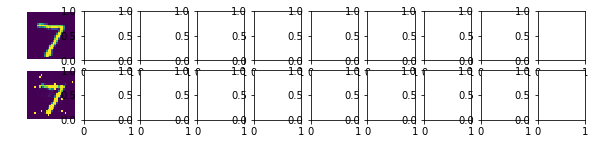

In [28]:
fig, ax = plt.subplots(2, sample_size, figsize = (sample_size, 2))

for i in range(sample_size):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        ax[1][i].imshow(np.reshape(samples[i],(28,28)))
        
        plt.show()

위쪽은 원본, 아래쪽은 신경망이 생성한 이미지입니다